In [2]:
from nlpkf.models.seq2seq import preprocess_catalan, Translator
all_english, all_catalan = preprocess_catalan("cat.txt")

In [3]:
eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)
def filter_prefixes(lang_1, lang_2, prefixes):
    filtered_1 = []
    filtered_2 = []
    for sent_1, sent_2 in zip(lang_1, lang_2): 
        if sent_1[5:].strip().lower().startswith(prefixes):
            filtered_1.append(sent_1)
            filtered_2.append(sent_2)
    return filtered_1, filtered_2
english, catalan = filter_prefixes(all_english, all_catalan, eng_prefixes)

In [5]:
tok_kwargs = dict(remove_stopwords=False, use_stems=False, 
                  to_lowercase=False, use_lemma=False,
                  remove_punctuation=True, normalize_strings=True)

In [18]:
trans = Translator(hidden_size=16, embedding_size=32,
                   tokenizer_kwargs=tok_kwargs,
                   pretrained=False)

In [9]:
%%time
x_corpus, y_corpus = trans.fit(english, catalan)

Building vocabulary.
Converting to tensors.
Initializing model and optimizers.
CPU times: user 3.68 s, sys: 3.84 s, total: 7.52 s
Wall time: 3.29 s


In [11]:
trans.train(x_corpus, y_corpus, print_every=10, n_iters=100, preprocess=False, plot_every=5)

  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 1s - left 0m 17s epoch: 10  complete: 10% loss: 16.7366


 60%|██████    | 9/15 [00:00<00:00, 89.02it/s]

Elapsed 0m 3s - left 0m 15s epoch: 20  complete: 20% loss: 16.0506


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 5s - left 0m 13s epoch: 30  complete: 30% loss: 15.7680


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 7s - left 0m 11s epoch: 40  complete: 40% loss: 15.1755


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 9s - left 0m 9s epoch: 50  complete: 50% loss: 14.3981


 60%|██████    | 9/15 [00:00<00:00, 82.06it/s]

Elapsed 0m 11s - left 0m 7s epoch: 60  complete: 60% loss: 14.8444


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 13s - left 0m 5s epoch: 70  complete: 70% loss: 14.3109


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 15s - left 0m 3s epoch: 80  complete: 80% loss: 13.9586


  0%|          | 0/15 [00:00<?, ?it/s]

Elapsed 0m 17s - left 0m 1s epoch: 90  complete: 90% loss: 14.7922


100%|██████████| 15/15 [00:00<00:00, 78.51it/s]

Elapsed 0m 18s - left 0m 0s epoch: 100  complete: 100% loss: 13.5869


([0.2304769515991211,
  1.0553676446278888,
  0.8596780498822529,
  1.2954707758767263,
  1.1608921448389689,
  1.059192030770438,
  1.1041285401298886,
  1.1908760468165078,
  0.9732683414504641,
  1.2933879034859794,
  1.0841249306996663,
  1.0175960438592093,
  1.1524601300557453,
  1.1157790263493854,
  1.0072794011660986,
  1.1343218235742478,
  1.1686726133028666,
  0.9260339640435717,
  1.3114540440695628,
  1.2161393562952676,
  1.1920215129852294,
  1.1877272605895999,
  1.0703058878580731,
  1.0354542720885505,
  1.2030384631383986,
  1.0591508905092875,
  1.0202361413410732,
  1.17445235706511,
  1.103100848197937,
  1.1010164045152209,
  1.157733358655657,
  1.1510192036628724,
  0.9732594779559545,
  1.13368839990525,
  1.11233362754186,
  0.9928229366030011,
  1.1404192720140731,
  1.1555716514587402,
  1.0198600803102766,
  0.9801218396141416,
  1.0724865794181824,
  0.9607303000631786,
  1.2492332344963437,
  1.1583921432495117,
  0.9385044705300103,
  1.289999507722400

<Figure size 432x288 with 0 Axes>

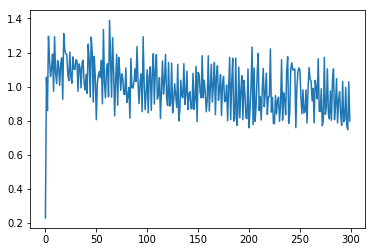

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
trans.plot_loss()

input = /SOS We are sorry for the inconvenience. /EOS
output = /SOS ets /EOS


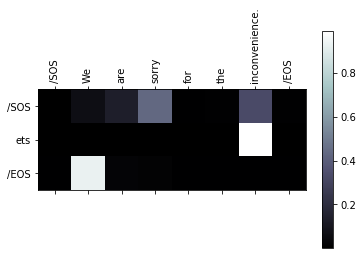

('/SOS We are sorry for the inconvenience. /EOS', ['/SOS', 'ets', '/EOS'])

In [13]:
trans.evaluate_attention(english[10])

In [16]:
trans.evaluate(english[10])

> /SOS We are sorry for the inconvenience. /EOS
< /SOS ets /EOS



In [15]:
trans.evaluate(english[10], catalan[10])

> /SOS We are sorry for the inconvenience. /EOS
= /SOS Ens sap greu la molèstia causada. /EOS
< /SOS ets /EOS

